In [622]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

% matplotlib inline 
# the last line forces the figures plotted to be shown in this file, instead of a separate screen

In [623]:
# I've chose some variables at the world bank database. The variables chosen relates to countries level of development. 
# The goal is to show how PCA works. Lets cluster the countries by similarity. 

data = pd.read_csv("data.csv")
print data.head(10)
print len(data)

            Countries  Overall level of statistical capacity (scale 0 - 100)  \
0            Maldives                                          66.666667       
1  West Bank and Gaza                                          82.222222       
2           Mauritius                                          85.555556       
3             Lebanon                                          62.222222       
4         Korea, Rep.                                           0.000000       
5         Netherlands                                           0.000000       
6              Rwanda                                          78.888889       
7               India                                          81.111111       
8             Burundi                                          54.444444       
9              Israel                                           0.000000       

   Population density (people per sq. km of land area)  \
0                                        1336.666667     
1  

In [624]:
# To start explaining PCA, lets start with a dataset with only two columns, GDP and Gross Capital Formation.
data1 = data[['GDP (current US$)','Gross capital formation (% of GDP)']]
print data1.head()
len(data1)

   GDP (current US$)  Gross capital formation (% of GDP)
0       3.094198e+09                            0.000000
1       1.271560e+10                           18.992419
2       1.280345e+10                           19.675715
3       4.573095e+10                           31.170709
4       1.411330e+12                           29.276903


185

In [625]:
# There are a lot of countries with entries equals to 0. This happens when there are no information. For this example, 
# lets delete the countries with this results. This is not the best choice. It would be to fill the information non 
# existant with the mean of similar countries, or to find other variables to use as a reference. 

data1 = data1[data1.loc[:]['GDP (current US$)']!=0]
data1 = data1[data1.loc[:]['Gross capital formation (% of GDP)']!=0]

# The PCA counts on Variance to indentify important features. As you can see abose, the scales of the variables are 
# different, and GDP is much higher than Gross Capital. If we were to implement PCA on this data, the first component 
# would look only to GDP, and capture all the variance (as a percentage). So, we have to normalize the data. 


data1['GDP (current US$)'] = (data1['GDP (current US$)']-np.mean(data1['GDP (current US$)']))/(np.max(data1['GDP (current US$)'])-np.min(data1['GDP (current US$)']))
data1['Gross capital formation (% of GDP)'] = (data1['Gross capital formation (% of GDP)']-np.mean(data1['Gross capital formation (% of GDP)']))/(np.max(data1['Gross capital formation (% of GDP)'])-np.min(data1['Gross capital formation (% of GDP)']))



179
2


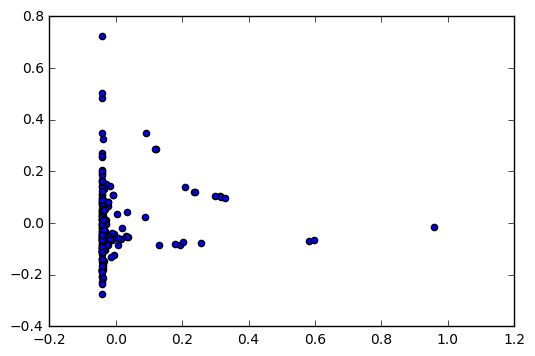

In [626]:
plt.scatter(data1['GDP (current US$)'],data1['Gross capital formation (% of GDP)'])
print len(data1)
print len(data1.T)


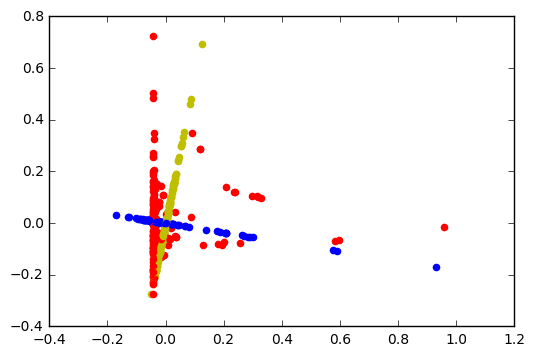

In [627]:
# Now lets go to the PCA. First, I'll plot the PCA to give a general idea of how it works. Then, we will assess each 
# component of the PCA. 

# The first principal component will appear as a series of yellow points, and the second principal component will
# appear as a series of red points. They are perpendicular to each other. 

pca = PCA(n_components = 2) # Here I called the PCA method (that was imported from sklearn at the top). Told the method
                            # that it should give me back two components. 
pca_final = pca.fit(data1) # Now I'm saying to the method that the data it should use is my set data1

first_pc = pca_final.components_[0] # the components_ are the eigenvectors. For now, just know that we are using 
                                    # them to transform the data. More on eigenvectors latter.  
second_pc = pca_final.components_[1]

data_transformed = pca_final.transform(data1) # Now We've transformed my data with the PCA. 
                                              #This means that I've separated each point of my data into two 
                                              #components. One is the projection of the data into the first principal 
                                              #component, and the second is the projection of each data (country) on 
                                              #the second principal comopnent.

plt.figure()
for i, j in zip (data_transformed, np.array(data1)):
    plt.scatter(first_pc[0]*i[0],first_pc[1]*i[0], color = 'y')
    plt.scatter(second_pc[0]*i[1],second_pc[1]*i[1], color = 'b')
    plt.scatter(j[0], j[1], color = 'r')
   



In [628]:
# The picture above shows that the first component (in yellow) captures the big density of points of x = 0, and the 
# second component captures the outliers 

# Now lets see the variance that each comonent captures

print pca_final.explained_variance_ # this code shows the variance captured by each eigenvalue (in order). We say that
                                    # the first component is the one that captures most variance and so on.
print pca_final.explained_variance_ratio_ # this is the variance captured by each principal component, as a percentage
                                          # of the total variance captured. The first principal component is
                                          # responsible for capturing 57.61 percent of all the variance presented on
                                          # on the data, and the second principal component captures 42.38%
  



[ 0.0197591   0.01453621]
[ 0.57614585  0.42385415]


In [629]:
# now lets see the eigenvectors.

print pca_final.components_[0]
print pca_final.components_[1]

# each number is a wheigh. the 0.17982237 is the wheigh given by the first principal component to the variable 
# 'GDP (current US$)', and 0.9836991 is the wheigh given to the variable 'Gross capital formation (% of GDP)'.
# This means that the second variable has more variance than the first one. The second component captures the remaining
# variance, and is perpendicular to the first one. 

# As a corolary, the number of principal components is equal to the number of variables. Later we will do the PCA for
# the hole dataset, 10 variables, meaning 10 PCAs.


[ 0.17982237  0.9836991 ]
[ 0.9836991  -0.17982237]


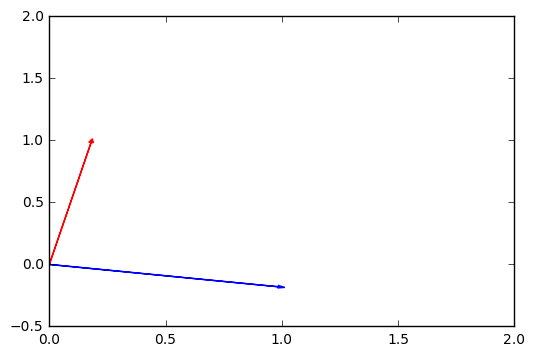

In [630]:
# The points presented above indicates the direction of each PCA. lets plot them to see the direction of each 

x1 = pca_final.components_[0][0]
x2 = pca_final.components_[0][1]

y1 = pca_final.components_[1][0]
y2 = pca_final.components_[1][1]

plt.axis([0, 2, -0.5, 2])
plt.arrow(0,0,x1,x2, color = 'r')
plt.arrow(0,0,y1,y2, color = 'b')

# The red arrow shows the direction of the first principal component. the graph above shows the projections of the
# data into those axes.




In [631]:
# Ok, now I would like to call attention to another important factor. We've seen that different scales leads to a bad
# performance of the PCA because the scale with the larger numbers probably will have a larger variance (except on 
# specific cases). 

# Another factor that leads to a bad performance of PCA is the presence of outliers. in our case, it is possible to see
# the presence of at least two outlier (see the first graph plotted). When an outlier is present, he is responsible for
# a big variance. Therefore, one principal component will have to "pay attention" only to this point (as it is its 
# goal to absorb variances). 

# There are some ways to deal with it. Here we will separate the outliers and assess them separately of the group. In
# other words, we will create a database for outliers and do the PCA for the rest of the data. Then we will do 
# cluster analysis using the outliers. Probably, the outliers are one cluster of its own.

# Lets remove the outliers before the normalization

data2 = data[['GDP (current US$)','Gross capital formation (% of GDP)']]
data2 = data2[data2.loc[:]['GDP (current US$)']!=0]
data2 = data2[data2.loc[:]['Gross capital formation (% of GDP)']!=0]

for item in data2:
    IQR = np.percentile(data2[item], 75) - np.percentile(data2[item], 25)
    delta = 1.5 * IQR
    maximum = np.percentile(data2[item], 75) + delta
    outliers = data2[data2[item]>=maximum]
    data2 = data2[data2[item]<maximum]
  

# The outliers definition used here is the same as the one used on boxplots. This video explains it
# https://www.youtube.com/watch?v=Cm_852R8JPw&t=122s

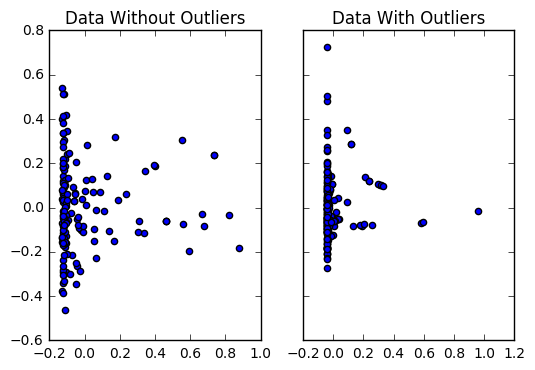

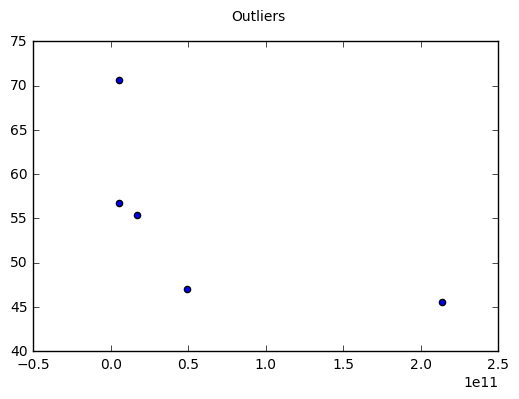

In [632]:
# Now lets normalize our data and plot it. Next we will plot the graph with outliers for comparisson, and the outliers 
# below (not normalized).

data2['GDP (current US$)'] = (data2['GDP (current US$)']-np.mean(data2['GDP (current US$)']))/(np.max(data2['GDP (current US$)'])-np.min(data2['GDP (current US$)']))
data2['Gross capital formation (% of GDP)'] = (data2['Gross capital formation (% of GDP)']-np.mean(data2['Gross capital formation (% of GDP)']))/(np.max(data2['Gross capital formation (% of GDP)'])-np.min(data2['Gross capital formation (% of GDP)']))


f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(data2['GDP (current US$)'],data2['Gross capital formation (% of GDP)'])
ax1.set_title('Data Without Outliers')
ax2.scatter(data1['GDP (current US$)'],data1['Gross capital formation (% of GDP)'])
ax2.set_title('Data With Outliers')

plt.figure()
plt.scatter(outliers['GDP (current US$)'],outliers['Gross capital formation (% of GDP)'])
plt.suptitle("Outliers")


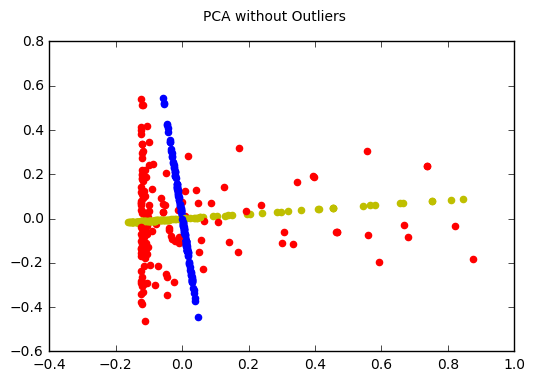

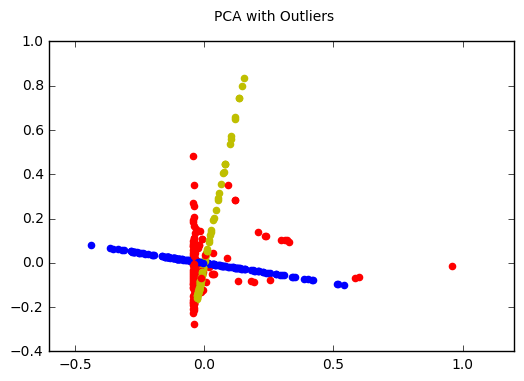

In [633]:
# It is possible to see that without outliers we can see more dispersion. But the mass of points near the zero is still
# large, specially regarding the GDP variable (x axis). Lets do the PCA and see how the eigenvalues compares with 
# the ones found with outliers.

pca = PCA(n_components = 2) 

pca_final_2 = pca.fit(data2) 

first_pc_2 = pca_final_2.components_[0] 

second_pc_2 = pca_final_2.components_[1]

data_transformed = pca_final_2.transform(data2) 




plt.figure()
plt.suptitle('PCA without Outliers')
for i, j in zip (data_transformed, np.array(data2)):
    plt.scatter(first_pc_2[0]*i[0],first_pc_2[1]*i[0], color = 'y')
    plt.scatter(second_pc_2[0]*i[1],second_pc_2[1]*i[1], color = 'b')
    plt.scatter(j[0], j[1], color = 'r')


plt.figure()
plt.suptitle('PCA with Outliers')
for i, j in zip (data_transformed, np.array(data1)):
    plt.scatter(first_pc[0]*i[0],first_pc[1]*i[0], color = 'y')
    plt.scatter(second_pc[0]*i[1],second_pc[1]*i[1], color = 'b')
    plt.scatter(j[0], j[1], color = 'r')


In [634]:
# Now, the first PCA (yellow) captures the variance capturing the horizontal variance, and the mass of points near zero on the
# x axis (that got more disperse) are captured by the second principal component (Blue)

# Lets see the variance captured by the first component

pca_final_2.explained_variance_ratio_

array([ 0.55469102,  0.44530898])

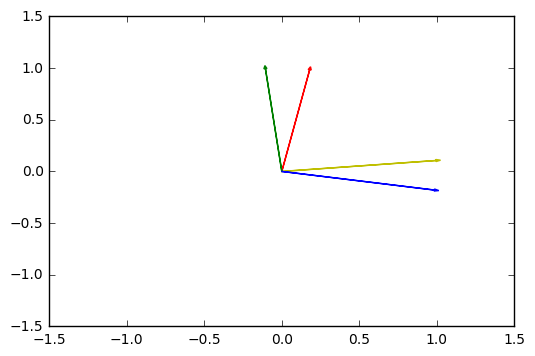

In [635]:
# Now the variance captured by the first component remains the same as the one with outliers (arround 57%). 
# Lets see the position of the components compared with the pca without outliers (in ----). 
x1 = pca_final_2.components_[0][0]
x2 = pca_final_2.components_[0][1]

x3 = pca_final.components_[0][0]
x4 = pca_final.components_[0][1]


y1 = pca_final_2.components_[1][0]
y2 = pca_final_2.components_[1][1]

y3 = pca_final.components_[1][0]
y4 = pca_final.components_[1][1]


plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.arrow(0,0,x1,x2, color = 'y')
plt.arrow(0,0,x3,x4, color = 'r')
plt.arrow(0,0,y1,y2, color = 'g')
plt.arrow(0,0,y3,y4, color = 'b')

# The red arrow shows the direction of the first principal component. the graph above shows the projections of the
# data into those axes.


In [651]:
# From this last graph it is possible to see that the new PCA (yellow and green) represents a huge negative rotation
# Of the pca with outliers (red and blue). See that the first component was almost perpendicular to the x axis (red 
# arrow) and now is almost parallel (yellow arrow). 

# in conclusion, removing outliers have impacts on our PCA. 

# Now, to finish, lets do the PCA for all the 10 variables of our database. First, lets prepare the data

# first, lets remove the countries with no information for one of the variables
for item in data.columns[1:11]:
    data = data[data.loc[:][item]!=0]

# Now lets remove the outliers
for item in data.columns[1:11]:
    IQR = np.percentile(data[item], 75) - np.percentile(data[item], 25)
    delta = 1.5 * IQR
    maximum = np.percentile(data[item], 75) + delta
    outliers = data[data[item]>=maximum]
    data2 = data[data[item]<maximum]

# Now lets normalize the data

for item in data.columns[1:11]:
    data[item] = (data[item]-np.mean(data[item]))/(np.max(data[item])-np.min(data[item]))

countries = data.pop("Countries")
# Lets print the outliers and see who they are

print outliers


           Countries  Overall level of statistical capacity (scale 0 - 100)  \
18           Vietnam                                           0.083786       
30        Seychelles                                          -0.140352       
57   Slovak Republic                                           0.187234       
58           Hungary                                           0.221717       
68          Malaysia                                           0.049303       
172      Congo, Rep.                                          -0.364490       

     Population density (people per sq. km of land area)  \
18                                            0.305890     
30                                            0.154098     
57                                            0.015356     
58                                            0.009380     
68                                           -0.019644     
172                                          -0.145307     

     Mortality rate, unde

In [652]:
pca = PCA(n_components = 10) 

pca_final = pca.fit(data) 

print pca_final.components_

print pca_final.explained_variance_ratio_

[[-0.34487318 -0.02239908  0.57210409 -0.45469873 -0.068612   -0.53773821
  -0.10479088 -0.00801204 -0.04979648 -0.19776689]
 [-0.33840442 -0.30093213  0.05185576  0.09772535  0.53824919 -0.032144
   0.45906456  0.39688086  0.3351813   0.10647264]
 [ 0.19592905  0.18476337 -0.09615133 -0.32471054  0.00321467  0.21955072
  -0.1250521   0.20614577  0.60248137 -0.58605591]
 [-0.03876159  0.57583171 -0.05070813 -0.16061612  0.63908505  0.09008087
  -0.12791134  0.12132723 -0.43126284 -0.07023544]
 [-0.15991884  0.47658076 -0.05347077 -0.25576169 -0.36430655  0.03254121
   0.06457632  0.38012833  0.21030602  0.59359003]
 [ 0.07711577 -0.46966189 -0.15907116 -0.32962496 -0.14701946  0.1842868
  -0.15007393  0.59623853 -0.44906686 -0.06522776]
 [-0.10361802 -0.22697293 -0.24993154 -0.66043911  0.1697648   0.23725619
   0.11698602 -0.52733975  0.06026652  0.24204427]
 [-0.10076942  0.20906766 -0.1155337  -0.06762939 -0.30006557  0.04247791
   0.78005553 -0.0412188  -0.29043576 -0.37660616]
 [ 

In [650]:
# now, as we have more variables, the variance captured by the first comopnent droped to 35.8%. All the analysis that
# we've done for the case of two variables are valid here, but unfortunately it is in 10 dimensions, and there is
# no way to visualize it. 


ValueError: could not convert string to float: Mongolia